# Feature Engineering 

Feature Engineering is the process of transforming raw data into meaningful features that can be used as input for advanceced visualisations or machine learning algorithms.

It involves selecting, creating, and transforming features to hopefully enhance the dataset.

Poorly designed features can lead to a disruptive dataset. 


## Types of Feature Engineering

* **Handling Missing Values**

    Filling missing values with appropriate strategies, e.g., mean, median, or constant values.

* **Encoding Categorical Variables**

    Converting categorical data into numeric form, such as one-hot encoding or label encoding. Only needed if you are building a model

* **Binning Numeric Variables**

    Grouping continuous data into bins or categories to simplify the representation.

* **Feature Scaling**

    Scaling features to bring them to a similar range, e.g., Min-Max scaling or Standard scaling.

* **Creating New Features**

    Generating new features by combining or transforming existing ones.

* **Handling Outliers**

    Managing extreme values that can affect model performance.

* **Feature Joining**

    Creating new features by combining multiple existing features.

## Imports and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("insurance_claims_clean.csv")

In [3]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Count Blank
0,328,48,521585,2014/10/17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,0
1,228,42,342868,2006/06/27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,0
2,134,29,687698,2000/09/06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,0
3,256,41,227811,1990/05/25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,0
4,228,44,367455,2014/06/06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,0


### Missing Values

In [4]:
null_counts = df.isnull().sum()
null_counts

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [5]:
df_new = df.drop("Count Blank", axis = 1)

In [6]:
df_new.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014/10/17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006/06/27,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000/09/06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990/05/25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014/06/06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


### Binding Numeric Data

In [7]:
df_new.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,999.000000,999.000000,999.000000,999.000000,999.000000,9.990000e+02,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,204.150150,38.964965,546085.689690,1133.133133,1256.830921,1.104104e+06,501101.607608,25171.223223,-26820.520521,11.639640,1.837838,0.991992,1.485485,52743.183183,7424.344344,7395.965966,37922.872873,2005.102102
std,115.003509,9.130087,257146.228457,610.359214,244.296347,2.297331e+06,71648.570711,27863.899188,28105.366259,6.953486,1.018727,0.820538,1.110859,26408.090085,4874.947422,4825.795816,18894.734325,6.018807
min,0.000000,19.000000,100804.000000,500.000000,433.330000,0.000000e+00,430104.000000,0.000000,-111100.000000,0.000000,1.000000,0.000000,0.000000,100.000000,0.000000,0.000000,70.000000,1995.000000
25%,116.000000,32.000000,335913.500000,500.000000,1090.175000,0.000000e+00,448373.000000,0.000000,-51500.000000,6.000000,1.000000,0.000000,1.000000,41775.000000,4290.000000,4440.000000,30275.000000,2000.000000
50%,200.000000,38.000000,532330.000000,1000.000000,1257.830000,0.000000e+00,466393.000000,0.000000,-24100.000000,12.000000,1.000000,1.000000,1.000000,57970.000000,6770.000000,6750.000000,42080.000000,2005.000000
75%,276.500000,44.000000,759459.500000,2000.000000,1415.710000,0.000000e+00,603221.500000,51050.000000,0.000000,17.000000,3.000000,2.000000,2.000000,70550.000000,11290.000000,10870.000000,50845.000000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.000000,2.000000,3.000000,114920.000000,21450.000000,23670.000000,79560.000000,2015.000000


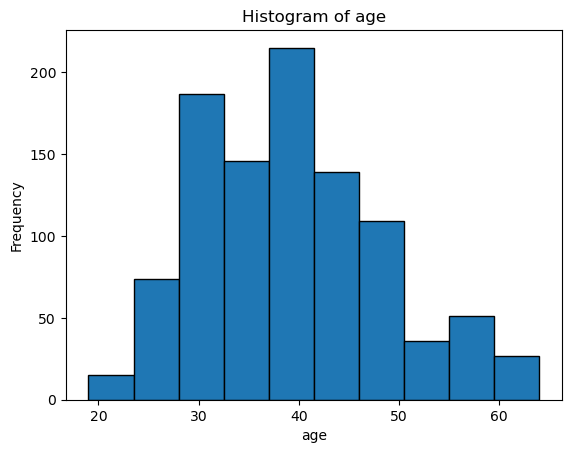

In [8]:
# Choose the column for the histogram
column_name = 'age'

# Plot the histogram
plt.hist(df[column_name], bins=10, edgecolor='black')

# Add labels and title
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title(f'Histogram of {column_name}')

# Display the histogram
plt.show()

In [9]:
bin_edges = [0, 30, 55, 100]  # Define the bin edges
bin_labels = ['Young Adult', 'Middle Aged', 'Elderly']  # Corresponding labels for each bin

# Create a new column based on the bin labels
df_new['ages_category'] = pd.cut(df_new['age'], bins=bin_edges, labels=bin_labels)

In [10]:
df_new.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,ages_category
0,328,48,521585,2014/10/17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,Middle Aged
1,228,42,342868,2006/06/27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,Middle Aged
2,134,29,687698,2000/09/06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,Young Adult
3,256,41,227811,1990/05/25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,Middle Aged
4,228,44,367455,2014/06/06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,Middle Aged


In [11]:
bin_edges_customer = [0, 25, 150, 500]  # Define the bin edges
bin_labels_customer = ['New Client', 'Established Client', 'Long-Term Client']  # Corresponding labels for each bin

# Create a new column based on the bin labels
df_new['customer_category'] = pd.cut(df_new['months_as_customer'], bins=bin_edges_customer, labels=bin_labels_customer)

In [12]:
df_new.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,ages_category,customer_category
0,328,48,521585,2014/10/17,OH,250/500,1000,1406.91,0,466132,...,71610,6510,13020,52080,Saab,92x,2004,Y,Middle Aged,Long-Term Client
1,228,42,342868,2006/06/27,IN,250/500,2000,1197.22,5000000,468176,...,5070,780,780,3510,Mercedes,E400,2007,Y,Middle Aged,Long-Term Client
2,134,29,687698,2000/09/06,OH,100/300,2000,1413.14,5000000,430632,...,34650,7700,3850,23100,Dodge,RAM,2007,N,Young Adult,Established Client
3,256,41,227811,1990/05/25,IL,250/500,2000,1415.74,6000000,608117,...,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,Middle Aged,Long-Term Client
4,228,44,367455,2014/06/06,IL,500/1000,1000,1583.91,6000000,610706,...,6500,1300,650,4550,Accura,RSX,2009,N,Middle Aged,Long-Term Client


## Creating New Features

In [13]:
df_new["Contract Years"] = df_new["months_as_customer"]/12

In [14]:
df_new.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,ages_category,customer_category,Contract Years
0,328,48,521585,2014/10/17,OH,250/500,1000,1406.91,0,466132,...,6510,13020,52080,Saab,92x,2004,Y,Middle Aged,Long-Term Client,27.333333
1,228,42,342868,2006/06/27,IN,250/500,2000,1197.22,5000000,468176,...,780,780,3510,Mercedes,E400,2007,Y,Middle Aged,Long-Term Client,19.000000
2,134,29,687698,2000/09/06,OH,100/300,2000,1413.14,5000000,430632,...,7700,3850,23100,Dodge,RAM,2007,N,Young Adult,Established Client,11.166667
3,256,41,227811,1990/05/25,IL,250/500,2000,1415.74,6000000,608117,...,6340,6340,50720,Chevrolet,Tahoe,2014,Y,Middle Aged,Long-Term Client,21.333333
4,228,44,367455,2014/06/06,IL,500/1000,1000,1583.91,6000000,610706,...,1300,650,4550,Accura,RSX,2009,N,Middle Aged,Long-Term Client,19.000000


## Feature Joining

In [15]:
df_new['total_premiums_paid'] = (df_new['policy_annual_premium']/12) * df_new['months_as_customer']

In [16]:
df_new.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,ages_category,customer_category,Contract Years,total_premiums_paid
0,328,48,521585,2014/10/17,OH,250/500,1000,1406.91,0,466132,...,13020,52080,Saab,92x,2004,Y,Middle Aged,Long-Term Client,27.333333,38455.540000
1,228,42,342868,2006/06/27,IN,250/500,2000,1197.22,5000000,468176,...,780,3510,Mercedes,E400,2007,Y,Middle Aged,Long-Term Client,19.000000,22747.180000
2,134,29,687698,2000/09/06,OH,100/300,2000,1413.14,5000000,430632,...,3850,23100,Dodge,RAM,2007,N,Young Adult,Established Client,11.166667,15780.063333
3,256,41,227811,1990/05/25,IL,250/500,2000,1415.74,6000000,608117,...,6340,50720,Chevrolet,Tahoe,2014,Y,Middle Aged,Long-Term Client,21.333333,30202.453333
4,228,44,367455,2014/06/06,IL,500/1000,1000,1583.91,6000000,610706,...,650,4550,Accura,RSX,2009,N,Middle Aged,Long-Term Client,19.000000,30094.290000


In [17]:
df_new['net_value_of_customer'] = df_new['total_premiums_paid'] - df_new['total_claim_amount']

In [18]:
df_new.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,ages_category,customer_category,Contract Years,total_premiums_paid,net_value_of_customer
0,328,48,521585,2014/10/17,OH,250/500,1000,1406.91,0,466132,...,52080,Saab,92x,2004,Y,Middle Aged,Long-Term Client,27.333333,38455.540000,-33154.460000
1,228,42,342868,2006/06/27,IN,250/500,2000,1197.22,5000000,468176,...,3510,Mercedes,E400,2007,Y,Middle Aged,Long-Term Client,19.000000,22747.180000,17677.180000
2,134,29,687698,2000/09/06,OH,100/300,2000,1413.14,5000000,430632,...,23100,Dodge,RAM,2007,N,Young Adult,Established Client,11.166667,15780.063333,-18869.936667
3,256,41,227811,1990/05/25,IL,250/500,2000,1415.74,6000000,608117,...,50720,Chevrolet,Tahoe,2014,Y,Middle Aged,Long-Term Client,21.333333,30202.453333,-33197.546667
4,228,44,367455,2014/06/06,IL,500/1000,1000,1583.91,6000000,610706,...,4550,Accura,RSX,2009,N,Middle Aged,Long-Term Client,19.000000,30094.290000,23594.290000


## Go wild

Go out a see what other features you can create that will be useful for our visualisations

## Feature Engineering and EDA

**Checking the correlation_matrix**

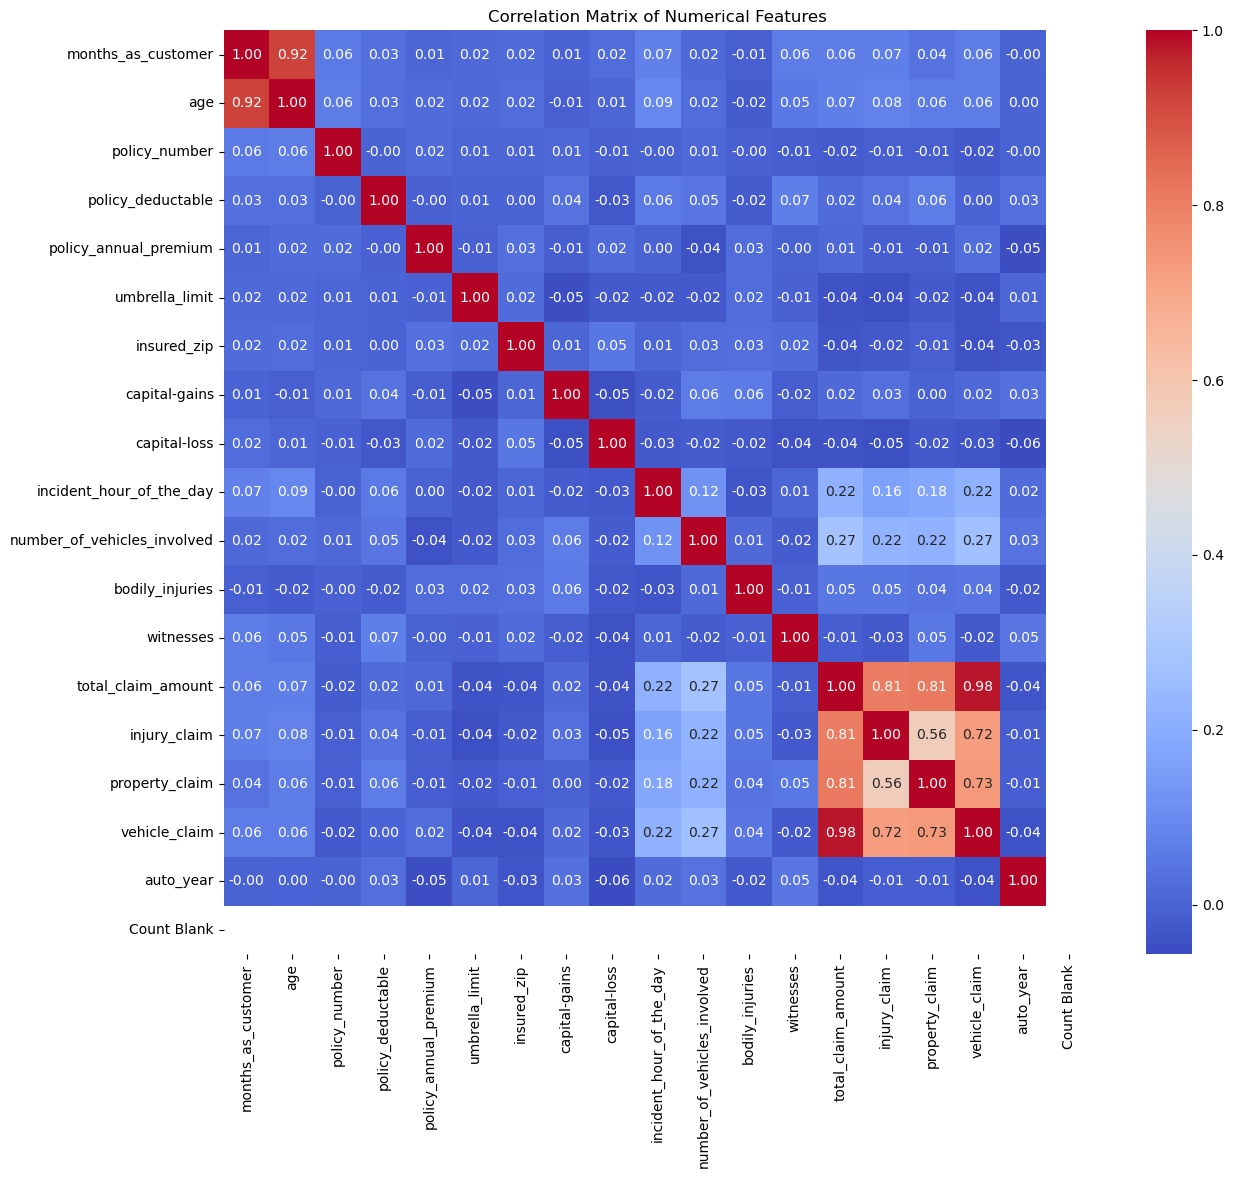

In [19]:
# Calculate the correlation matrix
correlation_matrix = df.select_dtypes(include=['int64', 'float64']).corr()

# Plot the heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

**Understanding the distribution of the total claim amounts**

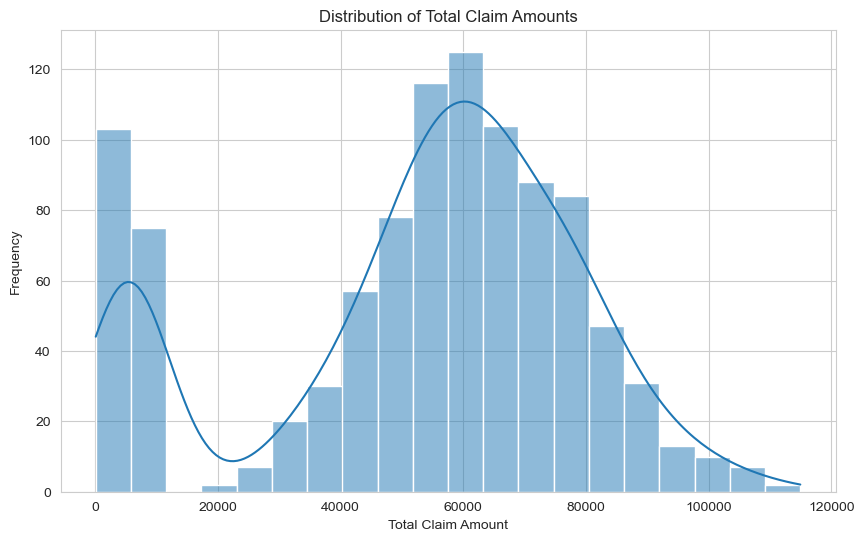

In [20]:
sns.set_style("whitegrid")

# Plotting the distribution of total claim amounts
plt.figure(figsize=(10, 6))
sns.histplot(df['total_claim_amount'], bins=20, kde=True)
plt.title('Distribution of Total Claim Amounts')
plt.xlabel('Total Claim Amount')
plt.ylabel('Frequency')
plt.show()

**Reviewing the type of claims**

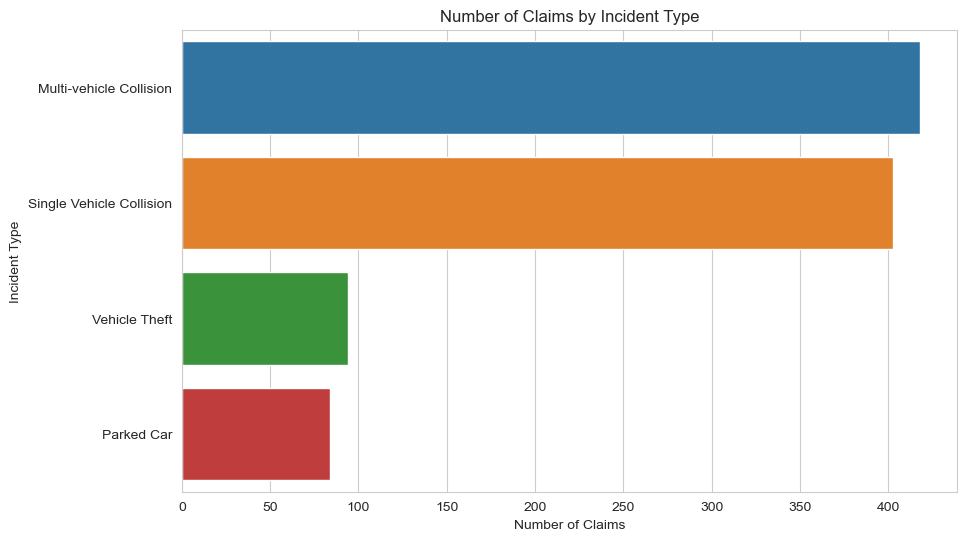

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(y='incident_type', data=df, order = df['incident_type'].value_counts().index)
plt.title('Number of Claims by Incident Type')
plt.xlabel('Number of Claims')
plt.ylabel('Incident Type')
plt.show()

**Getting an idea of the demography of claims**

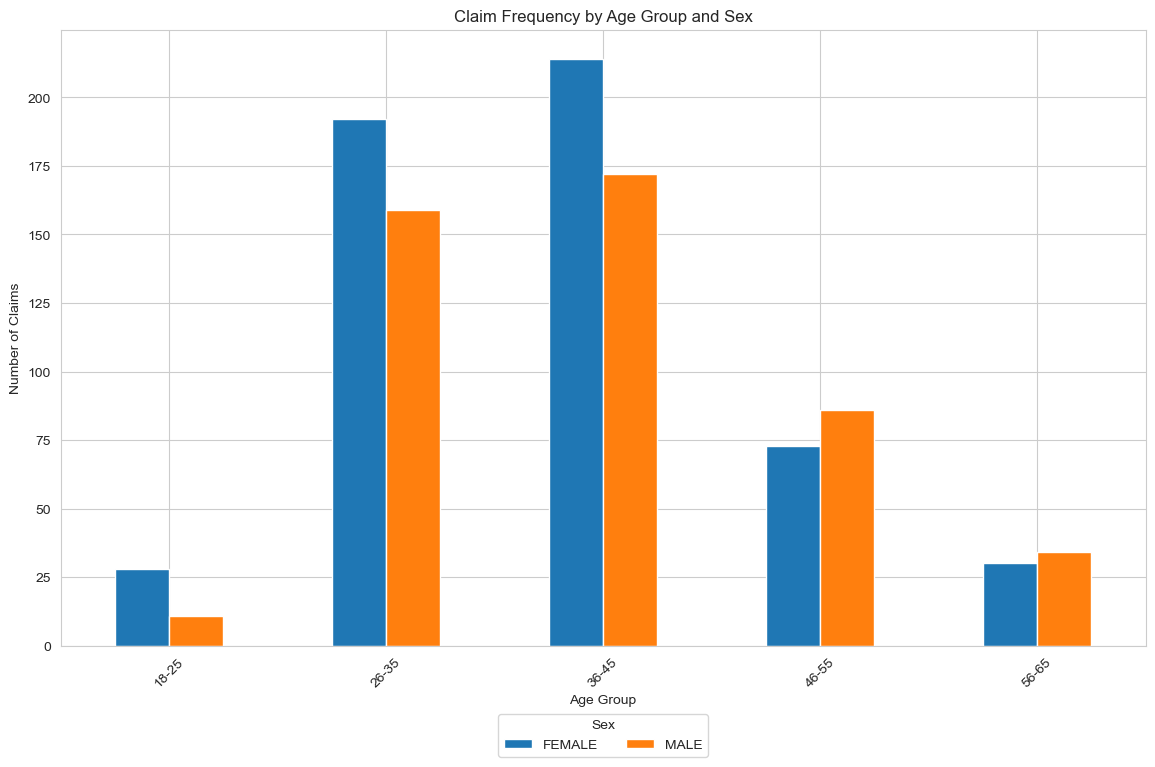

In [22]:
# Categorize age into groups
df_new['age_group'] = pd.cut(df['age'], bins=[17, 25, 35, 45, 55, 65], labels=['18-25', '26-35', '36-45', '46-55', '56-65'])

# Count the number of claims for each sex within each age group
claims_frequency_by_sex_age = df_new.groupby(['age_group', 'insured_sex']).size().unstack()

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plot the results
claims_frequency_by_sex_age.plot(kind='bar', figsize=(14, 8))
plt.title('Claim Frequency by Age Group and Sex')
plt.xlabel('Age Group')
plt.ylabel('Number of Claims')
plt.xticks(rotation=45)
plt.legend(title='Sex', loc='upper center', bbox_to_anchor=(0.5, -0.10), ncol=2)
plt.show()

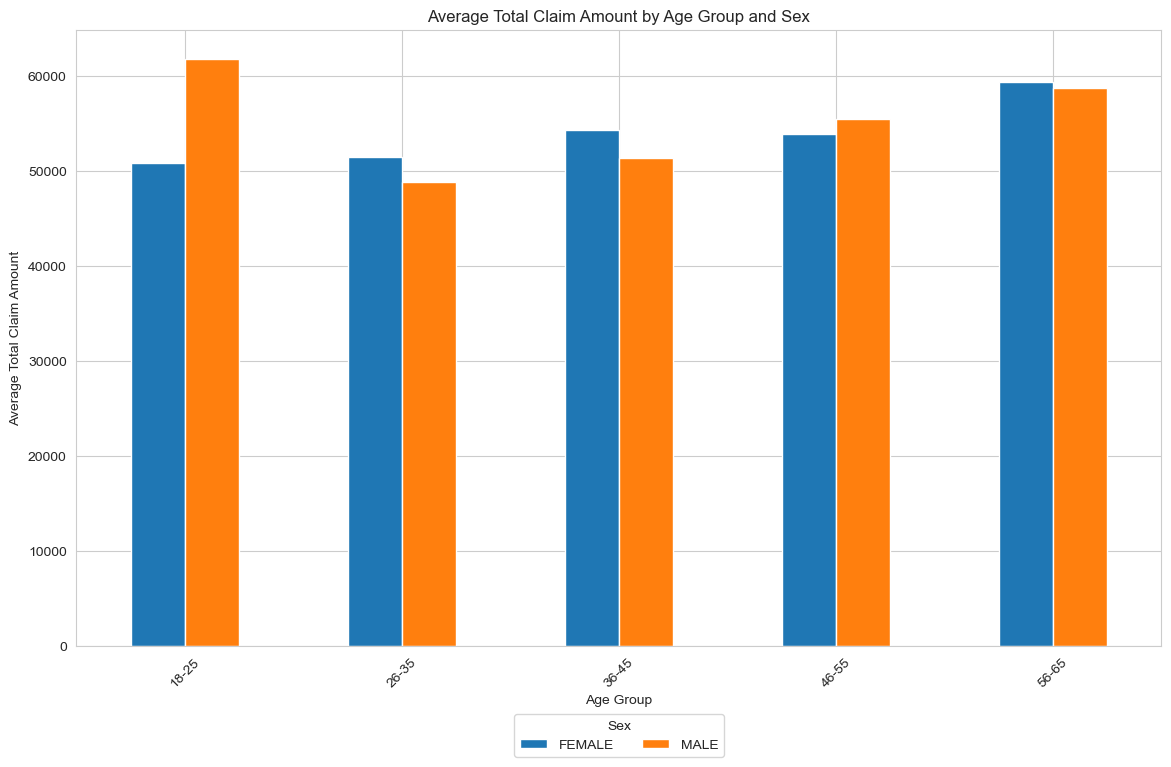

In [23]:
average_claims_by_sex_age = df_new.groupby(['age_group', 'insured_sex'])['total_claim_amount'].mean().unstack()

# plot the results
sns.set_style("whitegrid")
average_claims_by_sex_age.plot(kind='bar', figsize=(14, 8))
plt.title('Average Total Claim Amount by Age Group and Sex')
plt.xlabel('Age Group')
plt.ylabel('Average Total Claim Amount')
plt.xticks(rotation=45)
plt.legend(title='Sex', loc='upper center', bbox_to_anchor=(0.5, -0.10), ncol=2)
plt.show()

**Incidents: Time of day buckets**

In [24]:
bins = [0, 6, 12, 18, 24]
labels = ['Night', 'Morning', 'Afternoon', 'Evening']
df_new['time_of_day'] = pd.cut(df_new['incident_hour_of_the_day'], bins=bins, labels=labels, right=False)

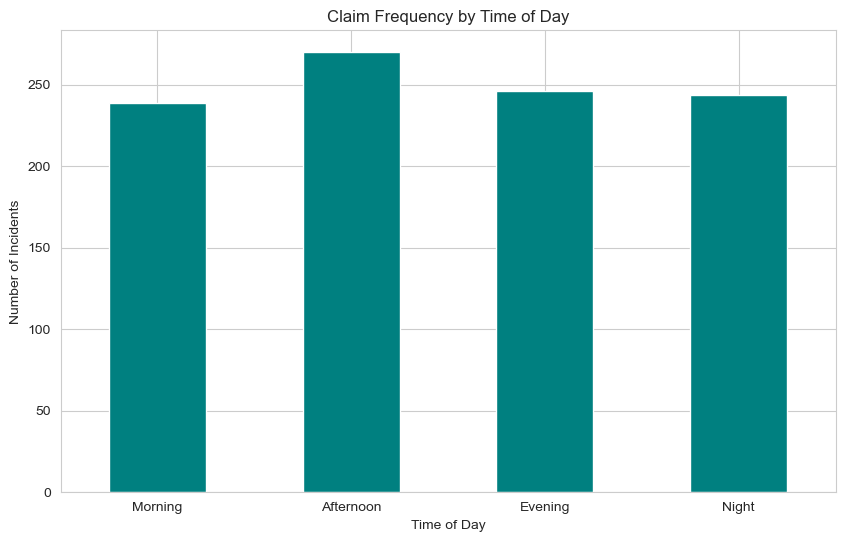

In [25]:
# Counting incidents by time of day
incident_counts_by_time = df_new['time_of_day'].value_counts()

plt.figure(figsize=(10, 6))
incident_counts_by_time.loc[['Morning', 'Afternoon', 'Evening', 'Night']].plot(kind='bar', color='teal')
plt.title('Claim Frequency by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=0)
plt.show()

**Age Grouping**

In [26]:
bins = [17, 25, 35, 45, 55, 65]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64']
df_new['age_group'] = pd.cut(df_new['age'], bins=bins, labels=labels, right=False, include_lowest=True)

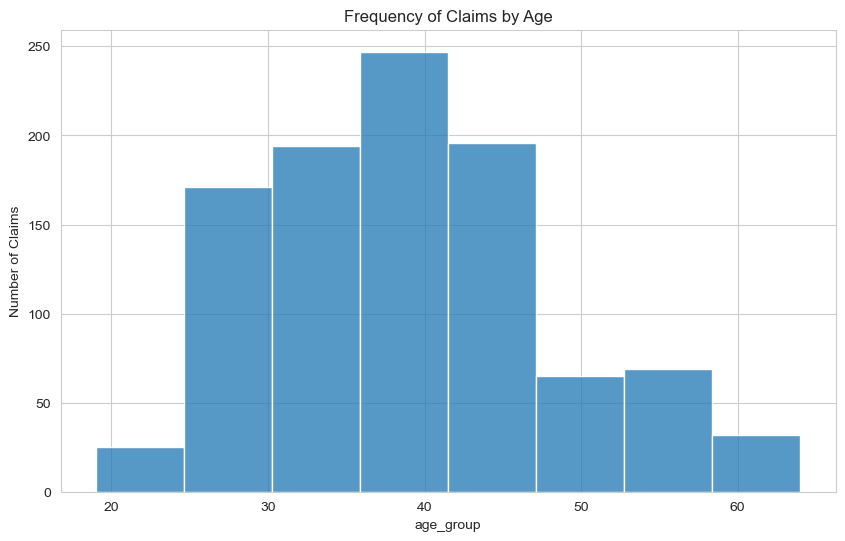

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=8, kde=False)
plt.title('Frequency of Claims by Age')
plt.xlabel('age_group')
plt.ylabel('Number of Claims')
plt.show()

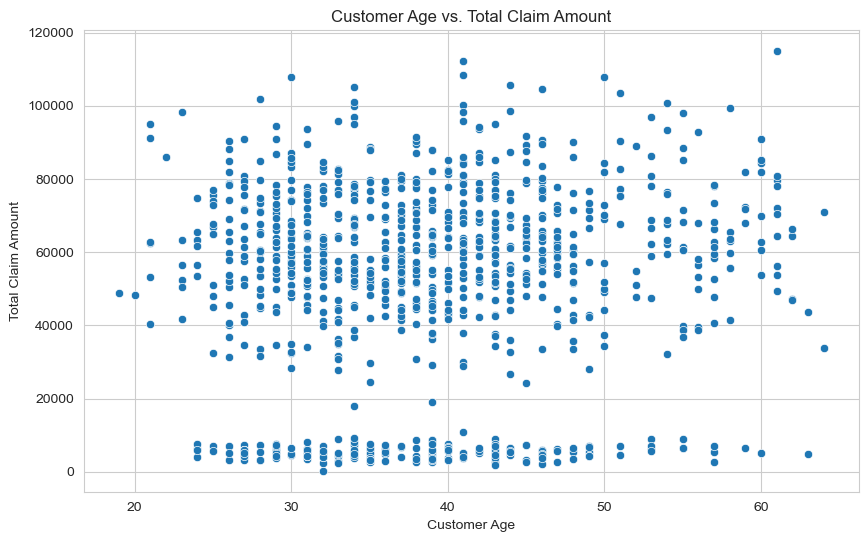

In [41]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='total_claim_amount', data=df)
plt.title('Customer Age vs. Total Claim Amount')
plt.xlabel('Customer Age')
plt.ylabel('Total Claim Amount')
plt.show()

**The graph below presents insights, notably that the "Average Policy Annual Premium" tends to be higher for individuals aged 50 and above. Conversely, the Claim Frequency for this age group is notably lower.**

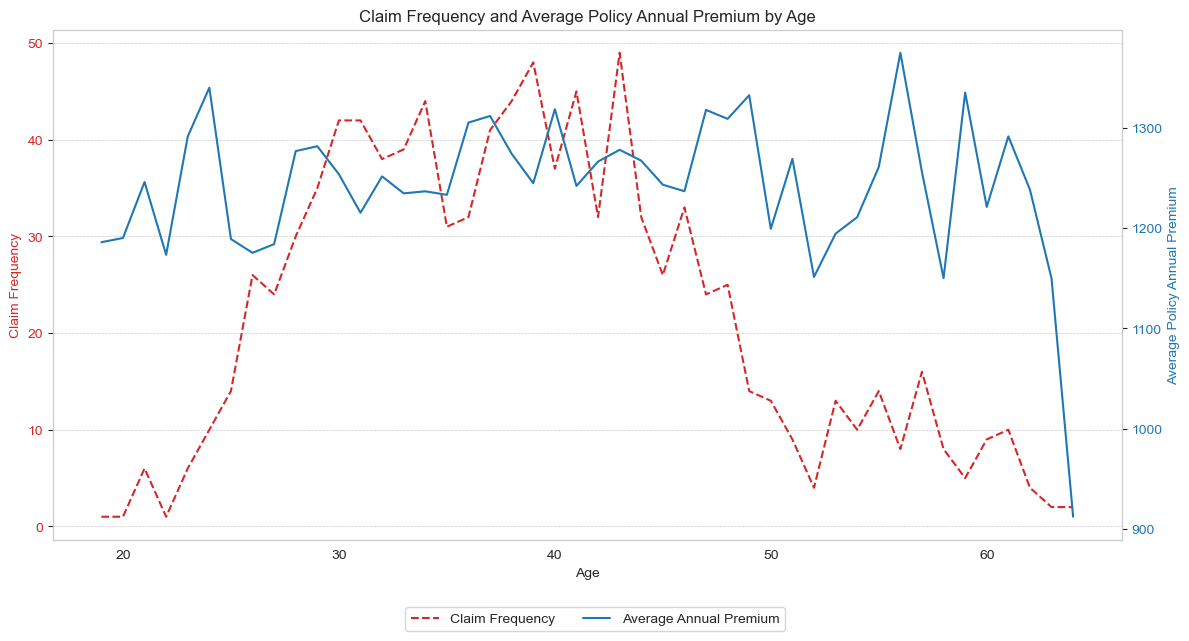

In [42]:
# Calculate Claim Frequency by Age
claim_freq_by_age = df_new['age'].value_counts().sort_index()

# Calculate Average Policy Annual Premium by Age
avg_premium_by_age = df_new.groupby('age')['policy_annual_premium'].mean()

# Setup plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Ploting Claim Frequency by Age
color = 'tab:red'
ax1.set_xlabel('Age')
ax1.set_ylabel('Claim Frequency', color=color)
ax1.plot(claim_freq_by_age.index, claim_freq_by_age.values, color=color, label='Claim Frequency', linestyle='--')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5) 
ax1.grid(False, which='both', axis='x') 

# Creating a second y-axis for average annual premium
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Average Policy Annual Premium', color=color)
ax2.plot(avg_premium_by_age.index, avg_premium_by_age.values, color=color, label='Average Annual Premium')
ax2.tick_params(axis='y', labelcolor=color)
ax2.grid(False)

# Final touches
plt.title('Claim Frequency and Average Policy Annual Premium by Age')
fig.legend(loc="upper center", bbox_to_anchor=(0.5, -0.01), ncol=2) 
plt.tight_layout()  
plt.show()

**Policy Age (Days)**

In [43]:
# Example of converting the date columns to datetime
df_new['incident_date'] = pd.to_datetime(df_new['incident_date'])
df_new['policy_bind_date'] = pd.to_datetime(df_new['policy_bind_date'])

# Now that both columns are datetime objects, you can subtract them
df_new['policy_age_days'] = (df_new['incident_date'] - df_new['policy_bind_date']).dt.days

**Policy Age (Years)**

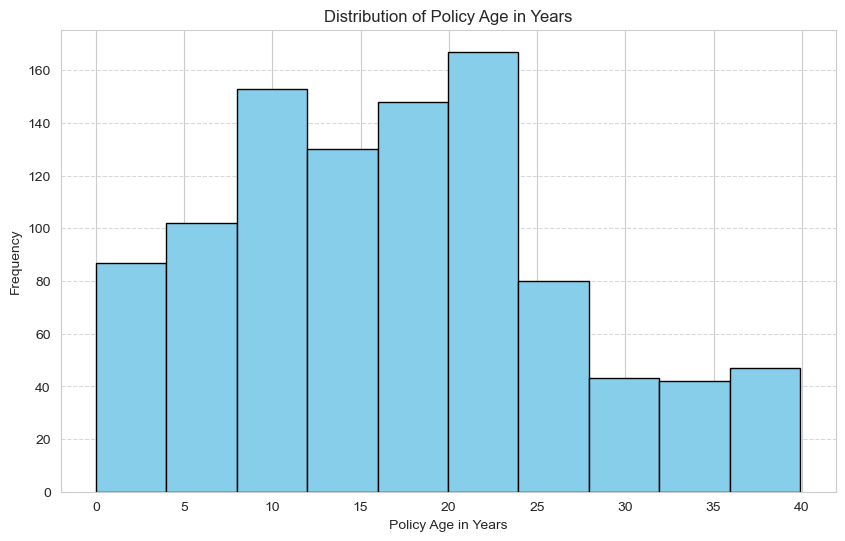

In [44]:
plt.figure(figsize=(10, 6))
plt.hist(df_new['Contract Years'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Policy Age in Years')
plt.xlabel('Policy Age in Years')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75, linestyle='--')  # Keep only horizontal grid lines with dashed style
plt.show()

**Distribution of fraud**

In [45]:
fraud_distribution = df['fraud_reported'].value_counts(normalize=True) * 100
print(fraud_distribution)

N    75.375375
Y    24.624625
Name: fraud_reported, dtype: float64


**Plotting the fruad reported by type of vehicle**

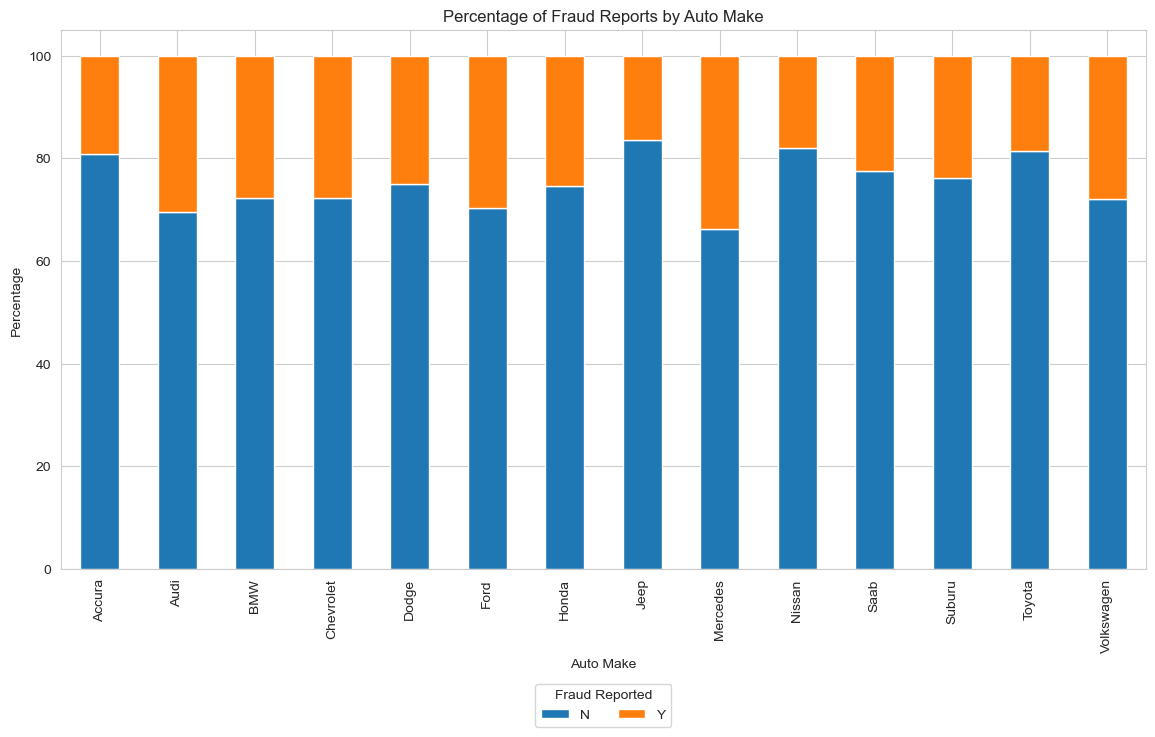

In [46]:
fraud_by_automake = df.groupby('auto_make')['fraud_reported'].value_counts(normalize=True).unstack() * 100
fraud_by_automake.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Percentage of Fraud Reports by Auto Make')
plt.ylabel('Percentage')
plt.xlabel('Auto Make')
plt.legend(title='Fraud Reported', loc='upper center', bbox_to_anchor=(0.5, -0.20), ncol=2)
plt.show()

**Severity Score**

In [47]:
# Assign numeric values to 'incident_severity' and then calculate the score
severity_scores = {"Trivial Damage": 1, "Minor Damage": 2, "Major Damage": 3, "Total Loss": 4}
df_new['severity_score'] = df_new['incident_severity'].map(severity_scores) + df_new['bodily_injuries'] + (df_new['total_claim_amount'] / 10000)

**Severity of incidents by state**

In [48]:
# Mapping incident severity to numerical values (adjust according to your actual severity categories)
severity_mapping = {
    'Minor Damage': 1,
    'Major Damage': 2,
    'Total Loss': 3,
    'Trivial Damage': 0
}
df['incident_severity_numeric'] = df['incident_severity'].map(severity_mapping)

# Calculating a 'severity score' for incidents in each state, factoring in severity, injuries, and incident type counts
# We'll give equal weight to severity and bodily injuries for simplicity
df['severity_score'] = df['incident_severity_numeric'] + df['bodily_injuries']

# Grouping by state and calculate the average severity score and count the incident types
state_incident_severity = df.groupby('incident_state').agg({'severity_score': 'mean', 
                                                            'incident_type': 'count',
                                                            'bodily_injuries': 'sum'}).rename(columns={'incident_type': 'incident_count'})

# Sorting states by severity score, then by number of injuries and incident count to see which has the 'worst' incidents
worst_states = state_incident_severity.sort_values(by=['severity_score', 'bodily_injuries', 'incident_count'], ascending=False)

print(worst_states)

                severity_score  incident_count  bodily_injuries
incident_state                                                 
OH                    3.090909              22               27
PA                    2.800000              30               31
VA                    2.772727             110              109
WV                    2.768519             216              213
SC                    2.736842             247              243
NY                    2.731061             264              259
NC                    2.572727             110              109


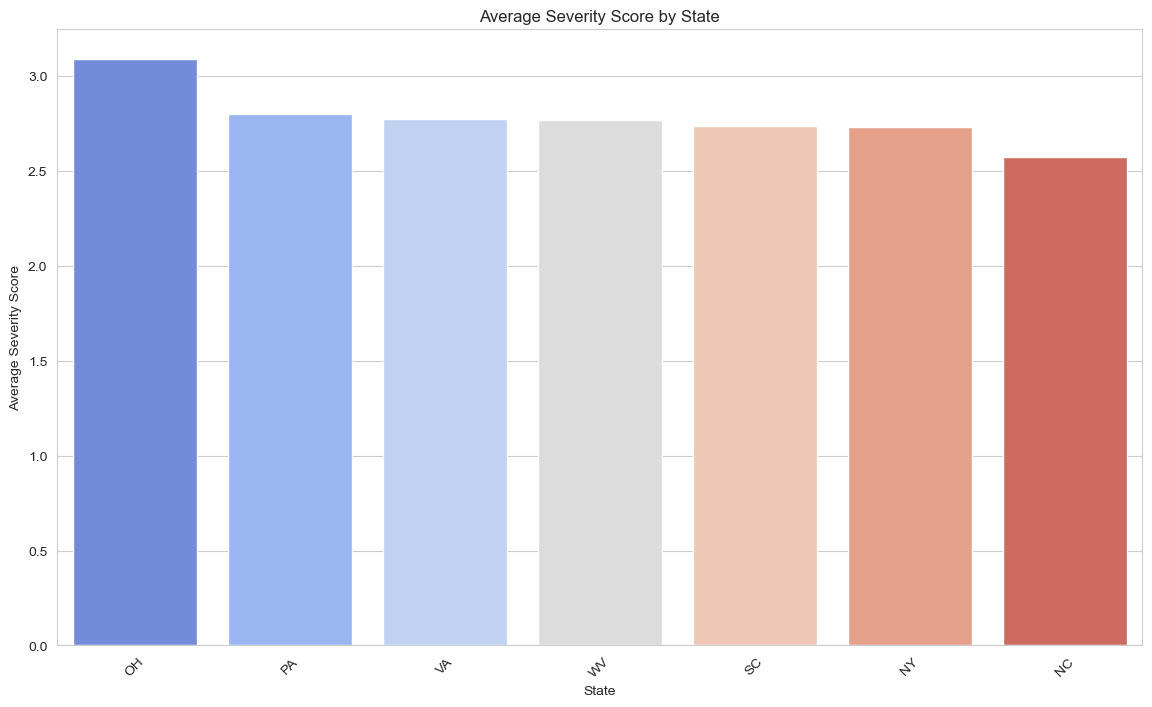

In [49]:
# Reset index to use 'incident_state' as a column
worst_states.reset_index(inplace=True)

# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(x='incident_state', y='severity_score', data=worst_states, palette='coolwarm')
plt.title('Average Severity Score by State')
plt.xlabel('State')
plt.ylabel('Average Severity Score')
plt.xticks(rotation=45)
plt.show()

**Count of each 'auto_make' in vehicle theft incidents**

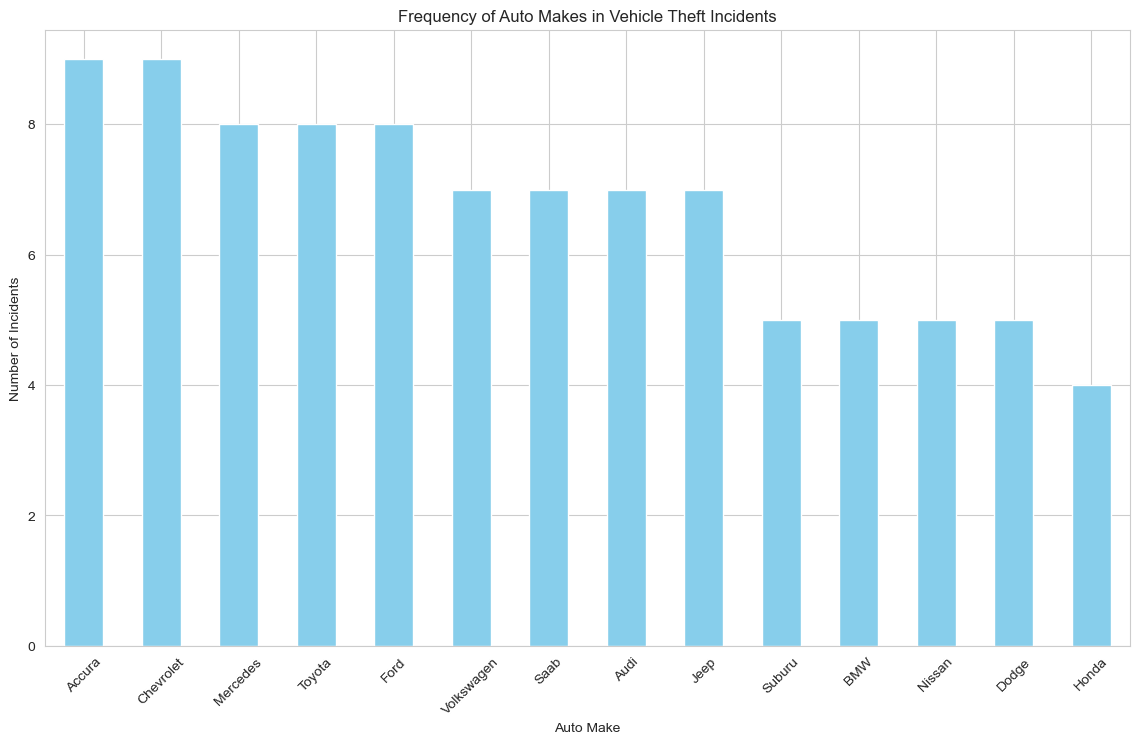

In [50]:
# Filter the dataset for 'Vehicle Theft' incidents
vehicle_theft_df = df[df['incident_type'] == 'Vehicle Theft']

# Count the occurrences of each 'auto_make' in vehicle theft incidents
auto_make_counts = vehicle_theft_df['auto_make'].value_counts()

# Plotting the results
plt.figure(figsize=(14, 8))
auto_make_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Auto Makes in Vehicle Theft Incidents')
plt.xlabel('Auto Make')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.show()

In [51]:
df_new.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,fraud_reported,ages_category,customer_category,Contract Years,total_premiums_paid,net_value_of_customer,age_group,time_of_day,policy_age_days,severity_score
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,Y,Middle Aged,Long-Term Client,27.333333,38455.540000,-33154.460000,45-54,Night,100,11.161
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,Y,Middle Aged,Long-Term Client,19.000000,22747.180000,17677.180000,35-44,Morning,3130,2.507
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,N,Young Adult,Established Client,11.166667,15780.063333,-18869.936667,25-34,Morning,5282,7.465
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,Y,Middle Aged,Long-Term Client,21.333333,30202.453333,-33197.546667,35-44,Night,8996,10.340
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,N,Middle Aged,Long-Term Client,19.000000,30094.290000,23594.290000,35-44,Evening,256,2.650


## Saving the csv for late

In [52]:
df_new.to_csv('Advanced Features Claims Data.csv')